<a href="https://colab.research.google.com/github/Tmmfaris/TestGibTm/blob/main/Intermediate_Assessment_3_Supervised(30_01_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


Load Train Dataset

In [2]:
# connecting out google drive onto the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/train_LZdllcl.csv'

train_df = pd.read_csv(filepath)
print("Train_df shape:", train_df.shape)
train_df.head()

Train_df shape: (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


##Exploratory Data Analysis

Data Types & Missing Values

In [4]:
train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


Statistical Summary

In [5]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Target Variable Distribution

In [6]:
train_df['is_promoted'].value_counts()
train_df['is_promoted'].value_counts(normalize=True)

,proportion
is_promoted,
0,0.91483
1,0.08517


Plot Target Distribution

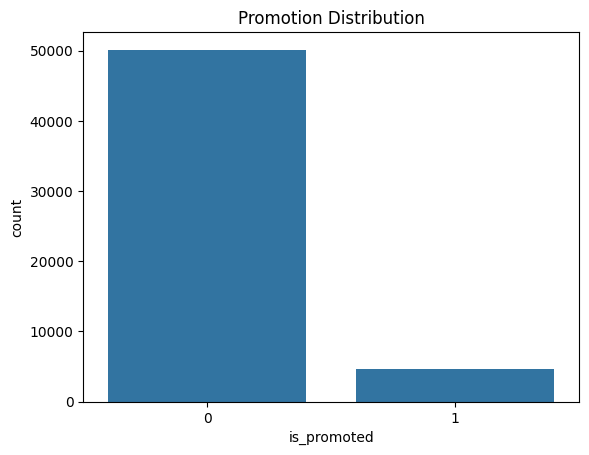

In [7]:
sns.countplot(x='is_promoted', data=train_df)
plt.title("Promotion Distribution")
plt.show()

Numerical Feature Analysis

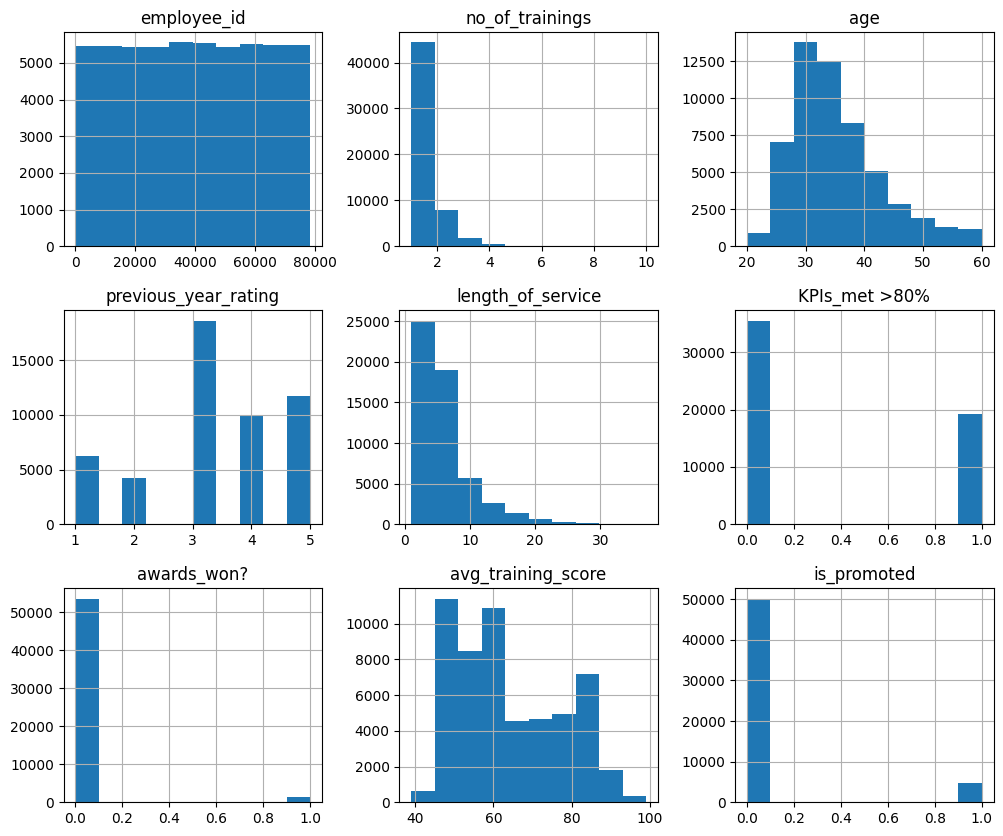

In [8]:
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns
train_df[numerical_cols].hist(figsize=(12,10))
plt.show()

In [9]:
train_df.groupby('is_promoted')[numerical_cols].mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
is_promoted,,,,,,,,,
0,39187.520423,1.257639,34.844037,3.267911,5.879398,0.319685,0.014180,62.647686,0.0
1,39285.092331,1.203299,34.372965,3.986140,5.716367,0.698800,0.119751,71.325193,1.0


Categorical Feature Analysis

In [10]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("\n", col)
    print(train_df[col].value_counts())


 department
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

 region
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

 education
educati

Promotion Rate by Category

In [11]:
for col in categorical_cols:
    print(pd.crosstab(train_df[col], train_df['is_promoted'], normalize='index'))

is_promoted               0         1
department                           
Analytics          0.904335  0.095665
Finance            0.918770  0.081230
HR                 0.943755  0.056245
Legal              0.948989  0.051011
Operations         0.909852  0.090148
Procurement        0.903614  0.096386
R&D                0.930931  0.069069
Sales & Marketing  0.927969  0.072031
Technology         0.892407  0.107593
is_promoted         0         1
region                         
region_1     0.904918  0.095082
region_10    0.921296  0.078704
region_11    0.943726  0.056274
region_12    0.934000  0.066000
region_13    0.913142  0.086858
region_14    0.925030  0.074970
region_15    0.920940  0.079060
region_16    0.930375  0.069625
region_17    0.863065  0.136935
region_18    0.967742  0.032258
region_19    0.939359  0.060641
region_2     0.919874  0.080126
region_20    0.942353  0.057647
region_21    0.956204  0.043796
region_22    0.885812  0.114188
region_23    0.883404  0.116596
region

KPI & Awards Impact

In [12]:
print(pd.crosstab(train_df['KPIs_met >80%'], train_df['is_promoted'], normalize='index'))
print(pd.crosstab(train_df['awards_won?'], train_df['is_promoted'], normalize='index'))

is_promoted           0         1
KPIs_met >80%                    
0              0.960413  0.039587
1              0.830906  0.169094
is_promoted         0         1
awards_won?                    
0            0.923251  0.076749
1            0.559843  0.440157


Correlation Heatmap

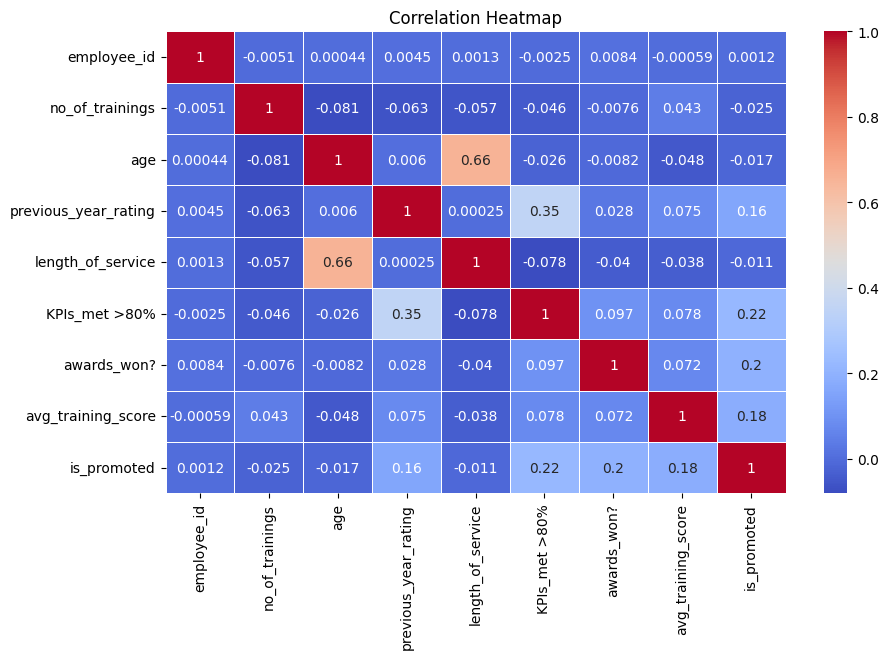

In [13]:
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

Boxplots for Outliers

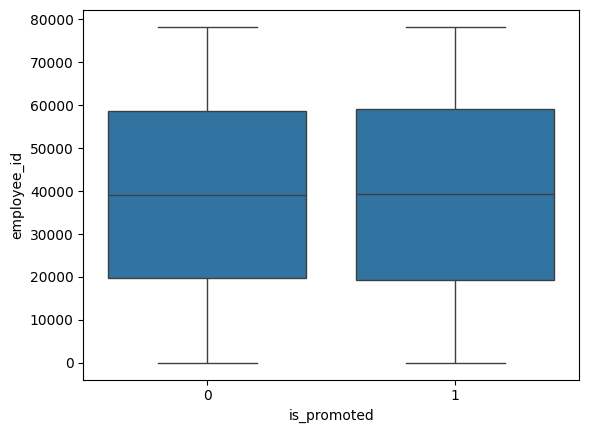

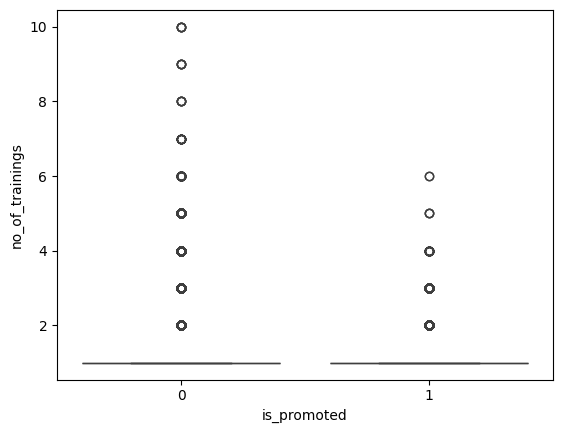

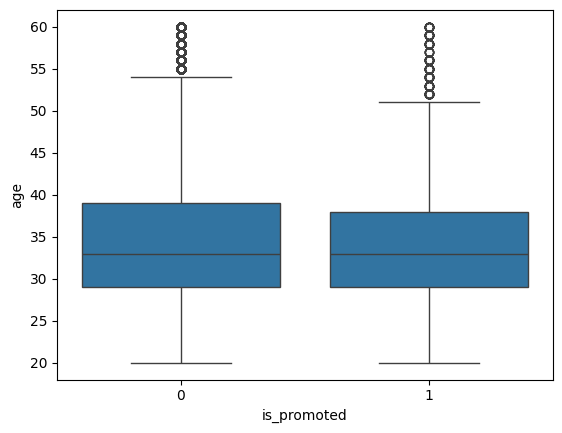

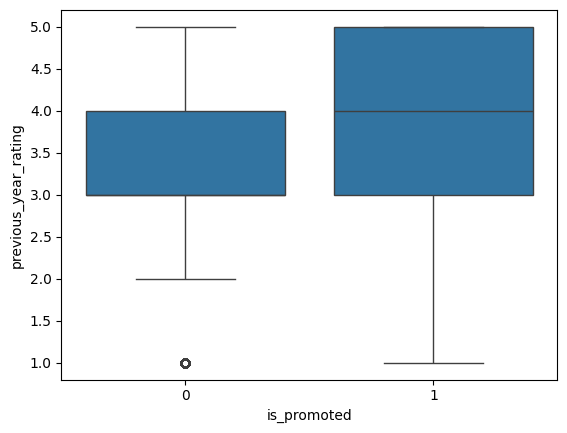

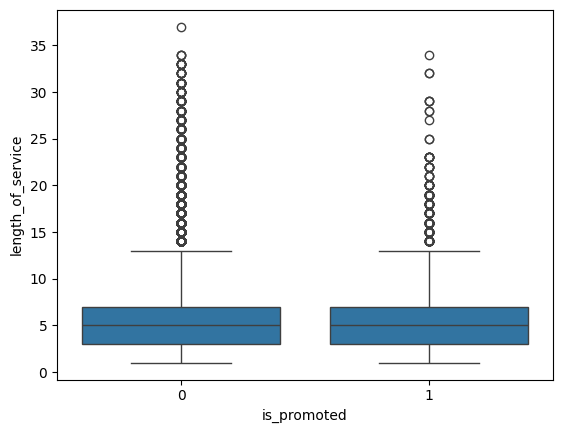

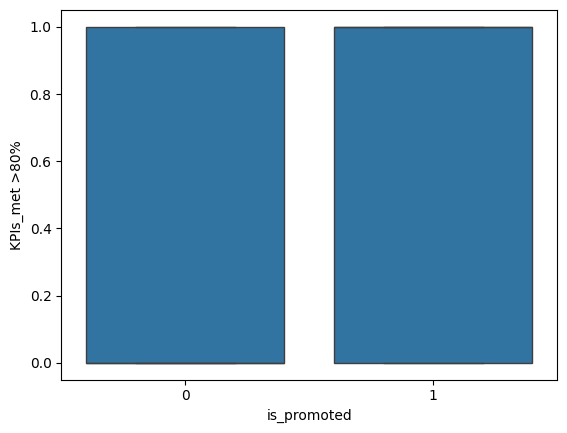

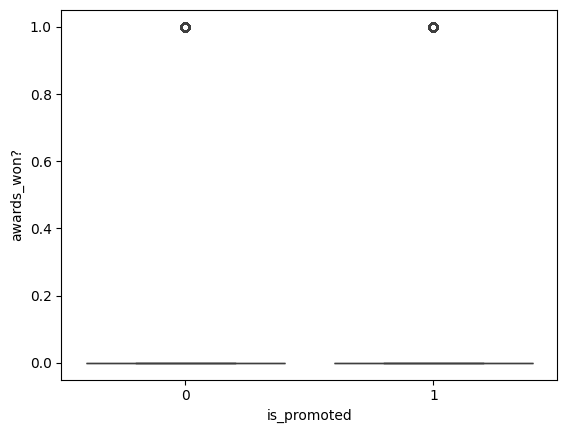

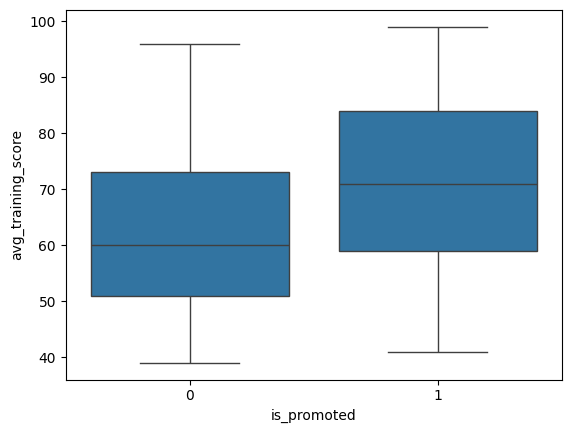

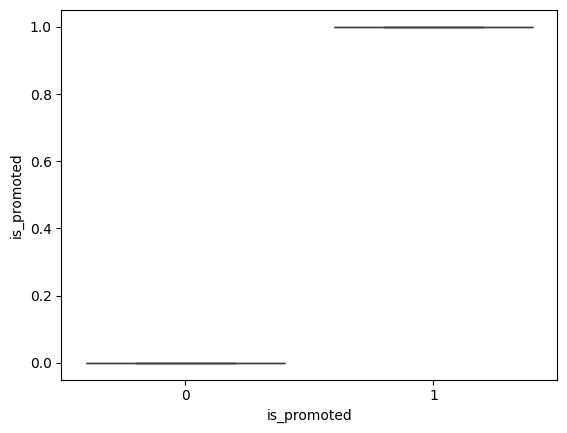

In [14]:
for col in numerical_cols:
    sns.boxplot(x='is_promoted', y=col, data=train_df)
    plt.show()

##Pre-processing

Load Test Data

In [15]:
filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/train_LZdllcl.csv'

test_df = pd.read_csv(filepath)
print("Test_df shape:", test_df.shape)
test_df.head()

Test_df shape: (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Check Missing Values

In [16]:
test_df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


Handle Missing Values (Train)

In [17]:
# Fill education with mode
train_df['education'] = train_df['education'].fillna(
    train_df['education'].mode()[0]
)

# Fill previous_year_rating with median
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(
    train_df['previous_year_rating'].median()
)

Handle Missing Values (Test)

In [18]:
# Fill education with mode
test_df['education'] = test_df['education'].fillna(
    test_df['education'].mode()[0]
)

# Fill previous_year_rating with median
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(
    test_df['previous_year_rating'].median()
)

Encode Categorical Variables (Train)

In [19]:
train_df = pd.get_dummies(train_df, drop_first=True)

Encode Categorical Variables (Test)

In [20]:
test_df = pd.get_dummies(test_df, drop_first=True)

Align Train and Test Columns

In [21]:
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

Separate Features and Target

In [22]:
X = train_df.drop(['is_promoted'], axis=1)
y = train_df['is_promoted']

Feature Scaling

In [23]:
# Align columns
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

##Modeling

Train-Test Split from Training Data

In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Initialize Model

In [25]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

Train the Model

In [26]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Validation Predictions

In [27]:
y_pred = model.predict(X_val)

Evaluate Model (F1 Score)

In [28]:
f1 = f1_score(y_val, y_pred)
print("F1 Score:", f1)

F1 Score: 0.3733203029562668


Classification Report

In [29]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10028
           1       0.24      0.82      0.37       934

    accuracy                           0.77     10962
   macro avg       0.61      0.79      0.61     10962
weighted avg       0.92      0.77      0.82     10962



Train Final Model on Full Data

In [30]:
model.fit(X_scaled, y)

LogisticRegression(class_weight='balanced', max_iter=1000)

Predict on Test Data

In [31]:
test_predictions = model.predict(test_scaled)

Prepare Submission File

In [32]:
filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/sample_submission_M0L0uXE.csv'

submission = pd.read_csv(filepath)
print("Submission shape:", submission.shape)

Submission shape: (23490, 2)


In [33]:
# 1. Load the ACTUAL test file fresh to ensure columns exist
test_filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/test_2umaH9m.csv'
test_df = pd.read_csv(test_filepath)

# 2. Handle Missing Values
# We use the columns from the fresh test_df
test_df['education'] = test_df['education'].fillna(test_df['education'].mode()[0])
test_df['previous_year_rating'] = test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].median())

# 3. Drop employee_id before encoding (it's not a feature)
test_ids = test_df['employee_id']
test_features_only = test_df.drop('employee_id', axis=1)

# 4. Encode (get_dummies)
test_df_encoded = pd.get_dummies(test_features_only, drop_first=True)

# 5. Align columns with the training features (X)
# This ensures test data has the exact same columns as the training data
test_df_final = test_df_encoded.reindex(columns=X.columns, fill_value=0)

# 6. Scale using the scaler fitted on training data
test_scaled = scaler.transform(test_df_final)

# 7. Predict
test_predictions = model.predict(test_scaled)

print("New prediction count:", len(test_predictions)) # Should be 23490

New prediction count: 23490


In [34]:
# This should now work without error
submission['is_promoted'] = test_predictions

# Save the file
submission.to_csv('final_submission.csv', index=False)
print("File saved successfully!")

File saved successfully!


##Fine tuning

Define Model

In [35]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

Define Hyperparameter Grid

In [36]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

Setup Grid Search

In [37]:
grid = GridSearchCV(
    model,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

Train Grid Search

In [38]:
grid.fit(X_scaled, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='f1')

Best Parameters

In [39]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'solver': 'lbfgs'}


 Best Model

In [40]:
best_model = grid.best_estimator_

Predict on Validation Data

In [41]:
y_val_pred = best_model.predict(X_val)

F1 Score After Tuning

In [42]:
print("Tuned F1 Score:", f1_score(y_val, y_val_pred))

Tuned F1 Score: 0.377728722099583


Final Prediction on Test Data

In [43]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [44]:
best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = f1_score(y_val, preds)

    print(name, "F1 Score:", score)

    if score > best_f1:
        best_f1 = score
        best_model = model

Logistic Regression F1 Score: 0.3733203029562668
Decision Tree F1 Score: 0.4297520661157025
Random Forest F1 Score: 0.40301003344481606


In [45]:
print("Best Model:", best_model)
print("Best F1 Score:", best_f1)

Best Model: DecisionTreeClassifier()
Best F1 Score: 0.4297520661157025


In [46]:
final_predictions = best_model.predict(test_scaled)

Save Final Submission

In [47]:
submission_path = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/sample_submission_M0L0uXE.csv'

submission = pd.read_csv(submission_path)
print("Submission shape:", submission.shape)

Submission shape: (23490, 2)


In [48]:
print("Predictions:", len(final_predictions))

Predictions: 23490


In [49]:
if len(final_predictions) == len(submission):
    submission['is_promoted'] = final_predictions
else:
    raise ValueError("Prediction length does not match submission format")

In [50]:
submission.to_csv("final_tuned_submission.csv", index=False)
print("Final tuned submission created successfully!")

Final tuned submission created successfully!


In [51]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [52]:
y_probs = best_model.predict_proba(X_val)[:,1]

best_f1, best_threshold = 0, 0

for t in np.arange(0.1, 0.9, 0.01):
    preds = (y_probs >= t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Best F1:", best_f1)

Best Threshold: 0.1
Best F1: 0.4297520661157025


In [53]:
num_cols = X.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(best_model, X_scaled, y, cv=skf, scoring='f1')
print("CV F1:", scores.mean())

CV F1: 0.4324995718017079


In [55]:
train_df['kpi_award'] = train_df['KPIs_met >80%'] * train_df['awards_won?']
train_df['service_age'] = train_df['length_of_service'] / (train_df['age']+1)
train_df['training_per_service'] = train_df['avg_training_score'] / (train_df['length_of_service']+1)

In [56]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=5, n_estimators=300)

In [57]:
submission['is_promoted'] = final_predictions

In [58]:
submission.to_csv("final_submission n.csv", index=False)
print("Submission file saved successfully!")

Submission file saved successfully!


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# 1. DEFINE CORRECT PATHS (Using your Drive location)
train_path = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/train_LZdllcl.csv'
test_path = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/test_2umaH9m.csv'

# Load Data fresh
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

def preprocess_hr(df):
    # Handle Missing Values
    df['previous_year_rating'] = df['previous_year_rating'].fillna(0)
    df['education'] = df['education'].fillna("Unknown")

    # --- FEATURE ENGINEERING ---
    # High Achiever Flag: Ratings + Award
    df['is_high_achiever'] = ((df['previous_year_rating'] == 5) &
                              (df['awards_won?'] == 1)).astype(int)

    # Performance relative to department
    df['dept_avg_score'] = df.groupby('department')['avg_training_score'].transform('mean')
    df['is_above_dept'] = (df['avg_training_score'] > df['dept_avg_score']).astype(int)

    return df

# Apply preprocessing
train_df = preprocess_hr(train_df)
test_df = preprocess_hr(test_df)

# 2. PREPARE FEATURES
X = pd.get_dummies(train_df.drop(['employee_id', 'is_promoted', 'dept_avg_score'], axis=1), drop_first=True)
y = train_df['is_promoted']

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. TRAIN MODEL
model = RandomForestClassifier(n_estimators=300, max_depth=12, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 4. OPTIMIZE THRESHOLD
y_probs = model.predict_proba(X_val)[:, 1]
best_threshold = 0.5
best_f1 = 0

for t in np.arange(0.2, 0.5, 0.01):
    preds = (y_probs >= t).astype(int)
    score = f1_score(y_val, preds)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

print(f"Optimal Threshold: {best_threshold:.2f} | Validation F1: {best_f1:.4f}")

# 5. FINAL TEST PREDICTION
X_test = pd.get_dummies(test_df.drop(['employee_id', 'dept_avg_score'], axis=1), drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

test_probs = model.predict_proba(X_test)[:, 1]
final_preds = (test_probs >= best_threshold).astype(int)

# Save the submission
submission = pd.DataFrame({'employee_id': test_df['employee_id'], 'is_promoted': final_preds})
submission.to_csv('final_high_score_submission.csv', index=False)
print("Submission file saved as 'final_high_score_submission.csv'")

Optimal Threshold: 0.49 | Validation F1: 0.3576
Submission file saved as 'final_high_score_submission.csv'
